In [1]:
import pandas as pd
import numpy as np

# 아래의 코드를 돌릴때 나는 경고문구를 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 모듈
import matplotlib as mpl
import matplotlib.pyplot as plt
# 배경색 흰색으로 맞춰줌
mpl.rc('figure', facecolor = 'w', edgecolor ='w')

# 색상지정을 위한 모듈
import seaborn as sns

#matplotlib 한글깨짐 지원
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False) 

- 데이터 불러오기

In [2]:
# 숙박업
path = './data/'
df = pd.read_csv(path+'fulldata_03_11_03_P_숙박업.csv', encoding='cp949')
df['객실수'] = df['한실수'] + df['양실수']

In [3]:
data = df[['번호', '인허가일자', '영업상태명','폐업일자','객실수', '도로명전체주소']];data

,번호,인허가일자,영업상태명,폐업일자,객실수,도로명전체주소
0,1,20050818,영업/정상,NaN,32.0,광주광역시 북구 중흥로91번길 12 (신안동)
1,2,20000615,영업/정상,NaN,42.0,광주광역시 북구 앰코로 30 (오룡동)
2,3,19851119,영업/정상,NaN,16.0,"광주광역시 북구 신임로 2-1 (임동, 4,5층)"
3,4,20000710,영업/정상,NaN,32.0,광주광역시 북구 저불로70번길 6-6 (용봉동)
4,5,20020429,영업/정상,NaN,28.0,광주광역시 북구 경양로165번길 8 (중흥동)
...,...,...,...,...,...,...
54116,54117,19920928,폐업,20181228.0,18.0,경기도 고양시 일산서구 고양대로632번길 74 (일산동)
54117,54118,19810124,폐업,20181224.0,5.0,경기도 고양시 일산서구 고양대로668번길 23 (일산동)
54118,54119,20201211,폐업,20210105.0,14.0,"울산광역시 중구 중앙3길 22, 1~3층 (성남동)"
54119,54120,20201230,폐업,20211125.0,50.0,제주특별자치도 서귀포시 중문관광로72번길 60 (색달동)


In [4]:
data['폐업일자_년'] = data['폐업일자'].apply(lambda x:int(str(int(x))[0:4]) if str(x) != 'nan' else x)
data['폐업일자_월'] = data['폐업일자'].apply(lambda x:str(int(x))[4:6] if str(x) != 'nan' else x)

- 코로나 발생 2020년 2월
- 2020년 2월 23일 코로나 '경계'단에서 '심각'단계로 격상
- 2020년 3월 22일부터 5월 5일까지 거리두기 처음 시행
- 2020년 8월 16일 다시 2단계 격상
- 2020년 8월 30일 2.5단계 격상

In [5]:
data['코로나이후폐업여부'] = data['폐업일자'].apply(lambda x: 'O' if x >= 20200201 else 'X') # 폐업여부 판단
data['지역_대'] = data['도로명전체주소'].apply(lambda x : x.split()[0] if type(x)==str else x) # 지역별로 확인하기 위함
data['지역_중'] = data['도로명전체주소'].apply(lambda x : x.split()[1] if type(x)==str else x) # 지역별로 확인하기 위함

In [6]:
data.head(3)

,번호,인허가일자,영업상태명,폐업일자,객실수,도로명전체주소,폐업일자_년,폐업일자_월,코로나이후폐업여부,지역_대,지역_중
0,1,20050818,영업/정상,NaN,32.0,광주광역시 북구 중흥로91번길 12 (신안동),NaN,NaN,X,광주광역시,북구
1,2,20000615,영업/정상,NaN,42.0,광주광역시 북구 앰코로 30 (오룡동),NaN,NaN,X,광주광역시,북구
2,3,19851119,영업/정상,NaN,16.0,"광주광역시 북구 신임로 2-1 (임동, 4,5층)",NaN,NaN,X,광주광역시,북구


## 코로나 이후 숙박업소의 타격

- 코로나가 시작한 12월을 조금 더 자세히 봄 -> 12월에 가장 많은 업소가 폐업 
    - 주제는 코로나와 공유숙박업소를 같이 보기 때문에 사용X

In [7]:
# # 2019년에 폐업한 업소수 확인 -> 코로나 12월
# closed_2019 = pd.DataFrame([['1월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "01"'))],
#                             ['2월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "02"'))],
#                             ['3월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "03"'))],
#                             ['4월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "04"'))],
#                             ['5월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "05"'))],
#                             ['6월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "06"'))],
#                             ['7월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "07"'))],
#                             ['8월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "08"'))],
#                             ['9월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "09"'))],
#                             ['10월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "10"'))],
#                             ['11월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "11"'))],
#                             ['12월', len(data.query('폐업일자_년 == 2019.0 and 폐업일자_월 == "12"'))],], columns=['월','폐업업소수']);closed_2019.head(3)

In [8]:
# # 그래프로 확인
# colors = sns.color_palette('pastel',len(closed_2019)) # 색상 지정

# plt.figure(figsize=(10,10))
# plt.barh(closed_2019['월'], closed_2019['폐업업소수'], color=colors, edgecolor='black')
# plt.title('2019 전국 폐업 숙박업소수', fontsize=20)
# plt.xlabel('폐업업소수', size=15)
# plt.ylabel('월', size=15)
# plt.savefig('./img/2019.png')
# plt.show()

- 년도별로 파악

    - 단순 업장 수만 확인

In [9]:
closed = []
for i in range(2010,2022):
    closed.append([f'{i}년', len(data.query('폐업일자_년 == @i'))])
# 데이터프레임으로 생성
closed = pd.DataFrame(closed, columns=['년/월', '폐업업소수']);closed.head(3)

,년/월,폐업업소수
0,2010년,809
1,2011년,790
2,2012년,872


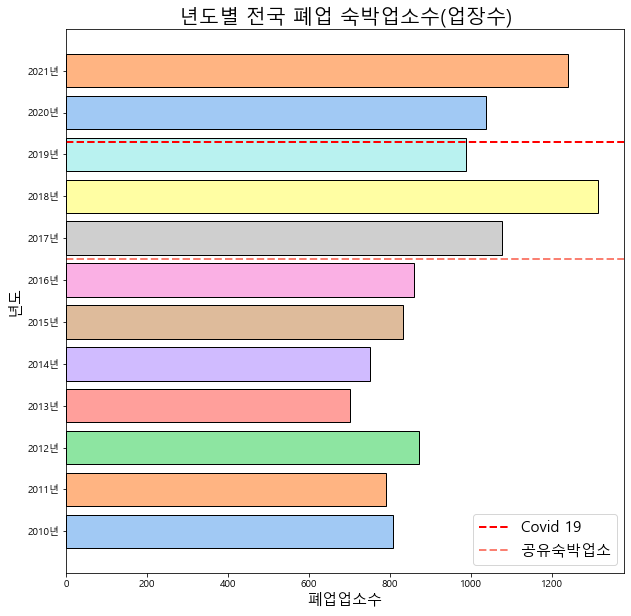

In [10]:
colors = sns.color_palette('pastel',len(closed)) # 색상 지정

plt.figure(figsize=(10,10))
plt.barh(closed['년/월'], closed['폐업업소수'], color=colors, edgecolor='black')
# plt.plot(closed['폐업업소수'], closed['년/월'], linestyle='--',marker='o', c='b')
plt.title('년도별 전국 폐업 숙박업소수(업장수)', fontsize=20)
plt.xlabel('폐업업소수', size=15)
plt.ylabel('년도', size=15)

plt.axhline(9.3, 0, 1, color='red', linestyle='--', linewidth=2, label='Covid 19')
plt.axhline(6.5, 0, 1, color='salmon', linestyle='--', linewidth=2, label='공유숙박업소')
plt.legend(fontsize = 15)
plt.savefig('./img/년도별 전국 폐업 숙박업소수(업장수).png')
plt.show()

    - 조금 더 정확하게 보기 위하여 객실수를 확인

In [11]:
closed = []
for i in range(2010,2022):
    closed.append([f'{i}년', len(data.query('폐업일자_년 == @i and 객실수 > 25'))])
# 데이터프레임으로 생성
closed = pd.DataFrame(closed, columns=['년/월', '폐업업소수']);closed

,년/월,폐업업소수
0,2010년,120
1,2011년,103
2,2012년,108
3,2013년,92
4,2014년,100
5,2015년,119
6,2016년,129
7,2017년,187
8,2018년,285
9,2019년,224


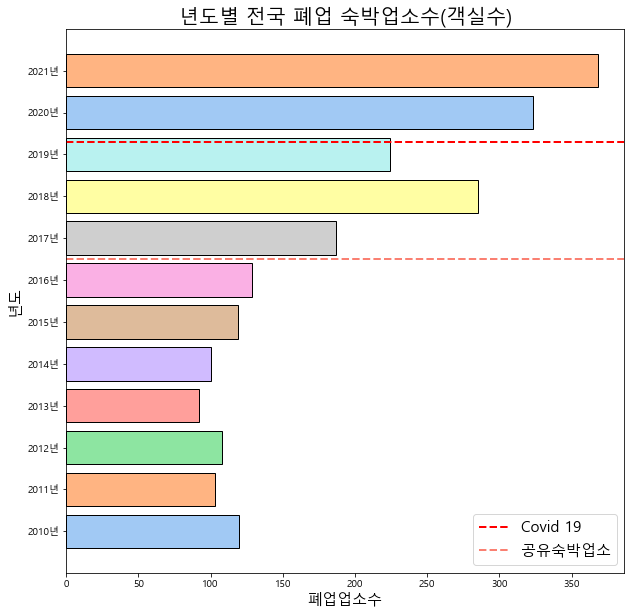

In [12]:
colors = sns.color_palette('pastel',len(closed)) # 색상 지정

plt.figure(figsize=(10,10))
plt.barh(closed['년/월'], closed['폐업업소수'], color=colors, edgecolor='black')
# plt.plot(closed['폐업업소수'], closed['년/월'], linestyle='--',marker='o', c='b')
plt.title('년도별 전국 폐업 숙박업소수(객실수)', fontsize=20)
plt.xlabel('폐업업소수', size=15)
plt.ylabel('년도', size=15)

plt.axhline(9.3, 0, 1, color='red', linestyle='--', linewidth=2, label='Covid 19')
plt.axhline(6.5, 0, 1, color='salmon', linestyle='--', linewidth=2, label='공유숙박업소')
plt.legend(fontsize = 15)
plt.savefig('./img/년도별 전국 폐업 숙박업소수(객실수).png')
plt.show()

- 숙박업소의 폐업을 이전과 이후로 나누어 확인

In [13]:
# 코로나 이전과 이후 비율 조사
ratio = pd.DataFrame([['이전',closed.iloc[:-5,1].sum()], ['이후', closed.iloc[-5:,1].sum()]],columns=['상태', '값'])

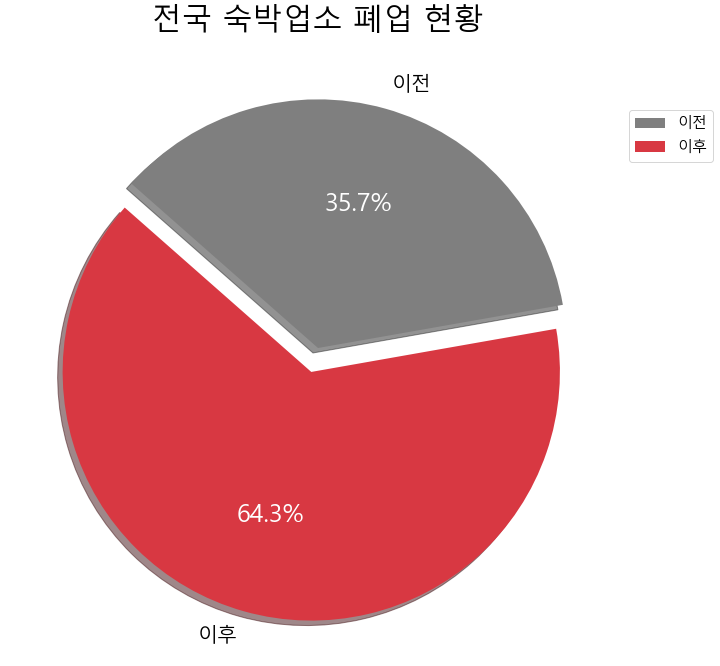

In [14]:
plt.figure(figsize=(10,10))
patches, texts, autotexts = plt.pie(
    ratio['값'],
    labels = ratio['상태'],
    labeldistance=1.1,## label이 파이로부터 얼마나 떨어지는가, 1일경우 딱 붙어있음. 
    explode=[0, 0.1], ##pie가 튀어나오는지 정해줌  
    startangle=10,## 어디에서 시작할지, 정해줌  
    shadow=True, ##그림자 
    autopct='%1.1f%%', ## pi 위에 표시될 글자 형태, 또한 알아서 %로 변환해서 알려줌 
    colors=['#7F7F7F', '#D83842']
)
plt.title('전국 숙박업소 폐업 현황', size = 30)
plt.legend(loc = (1, 0.8), fontsize=15)

for t in autotexts:
    t.set_color("white")
    t.set_fontsize(25)

for t in texts:
    t.set_fontsize(20)
plt.tight_layout()
plt.savefig('./img/전국 숙박업소 공유숙박,코로나 전,후 현황.png')
plt.show()

- 타격이 더 클것으로 예상되는 관광 지역별로 확인(제주, 부산)

In [15]:
closed_jeju = []
closed_busan = []
for i in range(2010,2022):
    closed_jeju.append([f'{i}년', len(data.query('폐업일자_년 == @i and 객실수 > 25 and 지역_대 == "제주특별자치도"'))])
    closed_busan.append([f'{i}년', len(data.query('폐업일자_년 == @i and 객실수 > 25 and 지역_대 == "부산광역시"'))])
# 데이터프레임으로 생성    
closed_jeju = pd.DataFrame(closed_jeju, columns=['년/월', '폐업업소수'])
closed_busan = pd.DataFrame(closed_busan, columns=['년/월', '폐업업소수'])

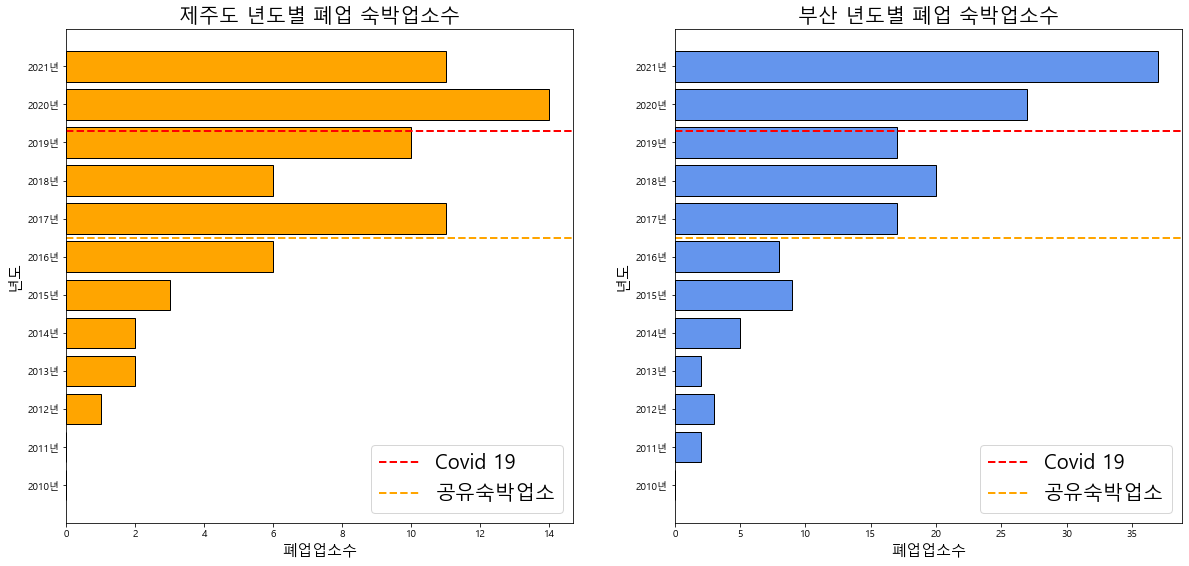

In [16]:
# 제주
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.barh(closed_jeju['년/월'], closed_jeju['폐업업소수'], color='orange', edgecolor='black')
plt.title('제주도 년도별 폐업 숙박업소수', fontsize=20)
plt.xlabel('폐업업소수', size=15)
plt.ylabel('년도', size=15)
plt.axhline(9.3, 0, 1, color='red', linestyle='--', linewidth=2, label='Covid 19')
plt.axhline(6.5, 0, 1, color='orange', linestyle='--', linewidth=2, label='공유숙박업소')
plt.legend(fontsize = 20, loc='lower right')

# 부산
plt.subplot(2, 2, 2)
plt.barh(closed_busan['년/월'], closed_busan['폐업업소수'], color='cornflowerblue', edgecolor='black')
plt.title('부산 년도별 폐업 숙박업소수', fontsize=20)
plt.xlabel('폐업업소수', size=15)
plt.ylabel('년도', size=15)

plt.axhline(9.3, 0, 1, color='red', linestyle='--', linewidth=2, label='Covid 19')
plt.axhline(6.5, 0, 1, color='orange', linestyle='--', linewidth=2, label='공유숙박업소')
plt.legend(fontsize = 20, loc='lower right')
plt.savefig('./img/주요관광도시 년도별 숙박업소 폐업현황_ver1.png')
plt.show()

- pie plot으로 확인
    - 2017,2018,2019,2020,2021 5년(코로나,숙박업소 시작이후)

In [17]:
# 코로나 이전과 이후 비율 조사
ratio_jeju = pd.DataFrame([['이전',closed_jeju.iloc[:-5,1].sum()], ['이후', closed_jeju.iloc[-5:,1].sum()]],columns=['상태', '값'])
ratio_busan = pd.DataFrame([['이전',closed_busan.iloc[:-5,1].sum()], ['이후', closed_busan.iloc[-5:,1].sum()]],columns=['상태', '값'])

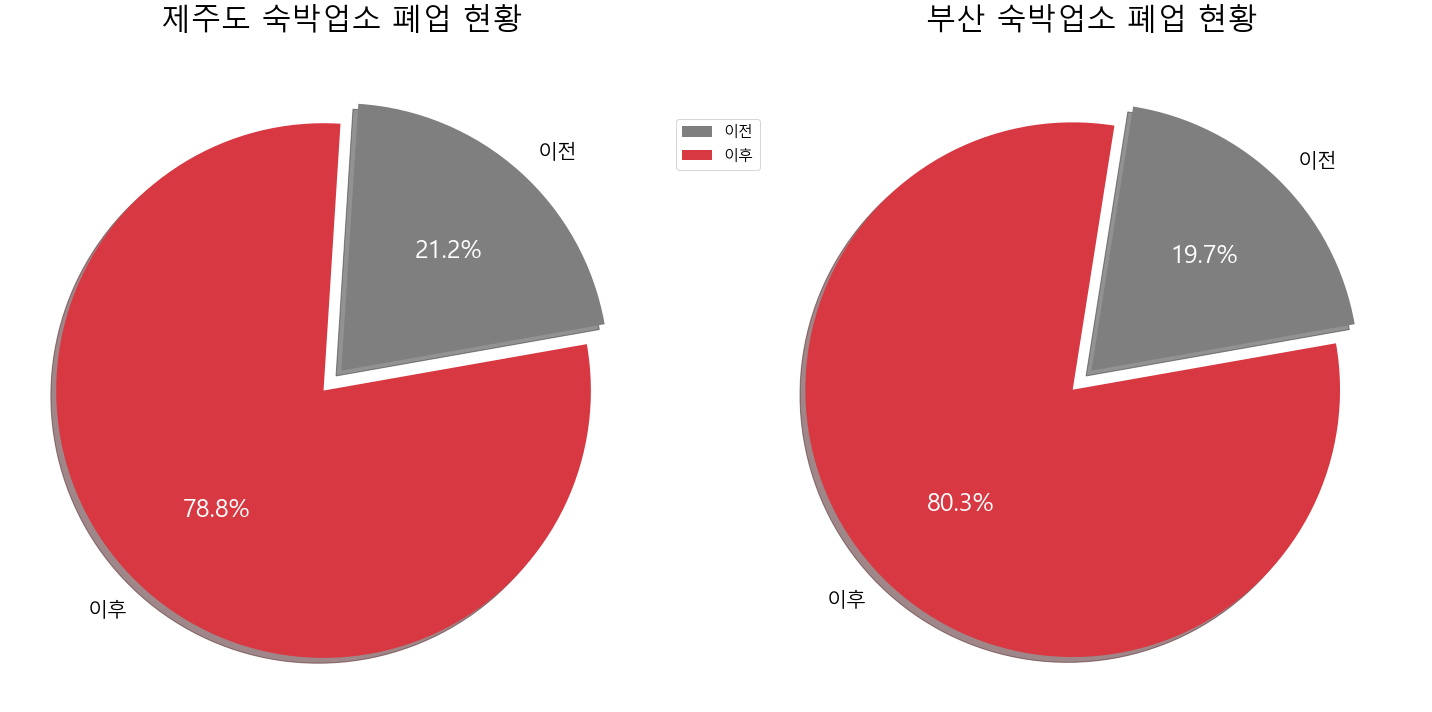

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
patches_jeju, texts_jeju, autotexts_jeju = plt.pie(
    ratio_jeju['값'],
    labels = ratio_jeju['상태'],
    labeldistance=1.1,## label이 파이로부터 얼마나 떨어지는가, 1일경우 딱 붙어있음. 
    explode=[0, 0.1], ##pie가 튀어나오는지 정해줌  
    startangle=10,## 어디에서 시작할지, 정해줌  
    shadow=True, ##그림자 
    autopct='%1.1f%%', ## pi 위에 표시될 글자 형태, 또한 알아서 %로 변환해서 알려줌 
    colors=['#7F7F7F', '#D83842']
)
plt.title('제주도 숙박업소 폐업 현황', size = 30)
plt.legend(loc = (1, 0.8), fontsize=15)

plt.subplot(2, 2, 2)
patches_busan, texts_busan, autotexts_busan = plt.pie(
    ratio_busan['값'],
    labels = ratio_busan['상태'],
    labeldistance=1.1,## label이 파이로부터 얼마나 떨어지는가, 1일경우 딱 붙어있음. 
    explode=[0, 0.1], ##pie가 튀어나오는지 정해줌  
    startangle=10,## 어디에서 시작할지, 정해줌  
    shadow=True, ##그림자 
    autopct='%1.1f%%', ## pi 위에 표시될 글자 형태, 또한 알아서 %로 변환해서 알려줌 
    colors=['#7F7F7F', '#D83842'],
)
plt.title('부산 숙박업소 폐업 현황', size = 30)

for t in autotexts_jeju:
    t.set_color("white")
    t.set_fontsize(25)

for t in texts_jeju:
    t.set_fontsize(20)

for t in autotexts_busan:
    t.set_color("white")
    t.set_fontsize(25)
    
for t in texts_busan:
    t.set_fontsize(20)    

plt.tight_layout()
plt.savefig('./img/주요관광도시 코로나 전,후 현황.png')
plt.show()

### END